## Import Required Libraries

In [1]:
import torch
import torchvision.datasets as dsets
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import random

In [2]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

print('device : ', device)
# for reproducibility
random.seed(777)
torch.manual_seed(777)
if device == 'cuda':
    torch.cuda.manual_seed_all(777)

device :  cuda


In [3]:
# parameters
training_epochs = 15
batch_size = 100

### torchvision.datasets 의 Parameter
- root : 데이터셋을 어느 경로에 받을 것인가?
- train : Train dataset을 다운 받을 것인지? Test dataset을 다운 받을 것인지?
- transform : 일반 이미지 (H,W,C) (픽셀값 : 0 ~ 255) --> Torch에서 쓸 수 있는 이미지 (C,H,W) (픽셀값 : 0 ~ 1)
- download : 만약 없을시 다운로드를 할 것인가?

In [4]:
# MNIST dataset
mnist_train = dsets.MNIST(root='MNIST_data/',
                          train=True,
                          transform=transforms.ToTensor(),
                          download=True)

mnist_test = dsets.MNIST(root='MNIST_data/',
                         train=False,
                         transform=transforms.ToTensor(),
                         download=True)

### torch.utils.data.DataLoader 의 Parameter
- dataset : 어떤 데이터셋을 읽어올 것인지?
- batch_size : batch_size를 몇으로 할 것인지?
- shuffle : dataset을 섞을 것인지?
- drop_last : 만약 batch_size만큼 데이터를 가져왔을 때, 남은 데이터는 어떻게 처리할 것인지?

In [5]:
# dataset loader
data_loader = torch.utils.data.DataLoader(dataset=mnist_train,
                                          batch_size=batch_size,
                                          shuffle=True,
                                          drop_last=True)

In [6]:
# MNIST data image of shape 28 * 28 = 784   Input : 784, Output : 10
linear = torch.nn.Linear(784, 10, bias=True).to(device)

In [7]:
# define cost/loss & optimizer
criterion = torch.nn.CrossEntropyLoss().to(device)    # Softmax is internally computed.
optimizer = torch.optim.SGD(linear.parameters(), lr=0.1)

In [8]:
for epoch in range(training_epochs):
    avg_cost = 0
    total_batch = len(data_loader)

    for X, Y in data_loader:
        # reshape input image into [batch_size by 784]
        # label is not one-hot encoded
        X = X.view(-1, 28 * 28).to(device)   # 
        Y = Y.to(device)

        # H(x) 구하기
        hypothesis = linear(X)
        
        # Cost function 구하기
        cost = criterion(hypothesis, Y)
        
        # Weight값 업데이트
        optimizer.zero_grad()
        cost.backward()
        optimizer.step()

        avg_cost += cost / total_batch

    print('Epoch:', '%04d' % (epoch + 1), 'cost =', '{:.9f}'.format(avg_cost))

print('Learning finished')

Epoch: 0001 cost = 0.535468459
Epoch: 0002 cost = 0.359274179
Epoch: 0003 cost = 0.331187546
Epoch: 0004 cost = 0.316578031
Epoch: 0005 cost = 0.307158172
Epoch: 0006 cost = 0.300180703
Epoch: 0007 cost = 0.295130193
Epoch: 0008 cost = 0.290851504
Epoch: 0009 cost = 0.287417084
Epoch: 0010 cost = 0.284379542
Epoch: 0011 cost = 0.281825215
Epoch: 0012 cost = 0.279800713
Epoch: 0013 cost = 0.277809024
Epoch: 0014 cost = 0.276154310
Epoch: 0015 cost = 0.274440825
Learning finished


Accuracy: 0.8862999677658081
Label:  8
Prediction:  3


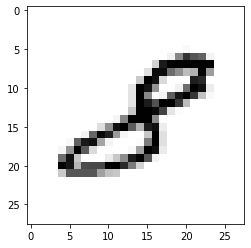

In [9]:
# Test the model using test sets
with torch.no_grad():      # test를 할 때는 기울기 값을 고정시켜야 한다.
    X_test = mnist_test.data.view(-1, 28 * 28).float().to(device)
    Y_test = mnist_test.targets.to(device)
    
    # 모델에서 나온 값
    prediction = linear(X_test)
    
    # 예측이 맞았는지 알아보기
    correct_prediction = torch.argmax(prediction, 1) == Y_test
    
    # Accuracy 구하기
    accuracy = correct_prediction.float().mean()
    print('Accuracy:', accuracy.item())

    # Get one and predict
    r = random.randint(0, len(mnist_test) - 1)
    X_single_data = mnist_test.data[r:r + 1].view(-1, 28 * 28).float().to(device)
    Y_single_data = mnist_test.targets[r:r + 1].to(device)

    print('Label: ', Y_single_data.item())
    single_prediction = linear(X_single_data)
    print('Prediction: ', torch.argmax(single_prediction, 1).item())
    
    # Visualization
    plt.imshow(mnist_test.data[r:r + 1].view(28, 28), cmap='Greys', interpolation='nearest')
    plt.show()